In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.metrics import r2_score

In [104]:
# ЗАГРУЗКА, ОБЗОР И ПОДГОТОВКА ДАННЫХ

In [105]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [106]:
train_data.shape

(10000, 20)

In [107]:
test_data.shape

(5000, 19)

In [108]:
train_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [109]:
test_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [110]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [111]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

<AxesSubplot:>

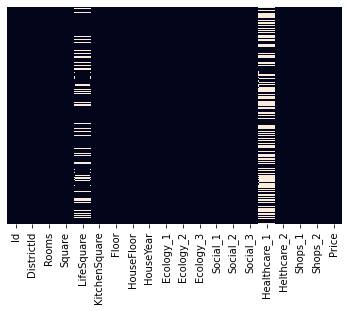

In [112]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

In [113]:
train_data = train_data.drop(['LifeSquare', 'Healthcare_1'], axis=1)

<AxesSubplot:>

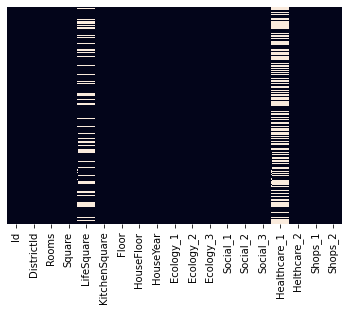

In [114]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

In [115]:
test_data = test_data.drop(['LifeSquare', 'Healthcare_1'], axis=1)

In [116]:
# АНАЛИЗ ДАННЫХ

In [117]:
# Нормальное распределение целевой переменной (Price)

/Users/phocaman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


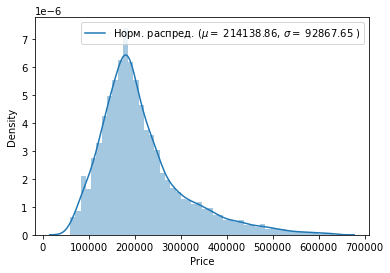

In [118]:
sns.distplot(train_data['Price'])
mean_, std_ = norm.fit(train_data['Price'])
plt.legend([f'Норм. распред. ($\mu=$ {mean_:.2f}, $\sigma=$ {std_:.2f} )'], loc='best')

In [119]:
# Распределение переменной "Площадь" (Square)

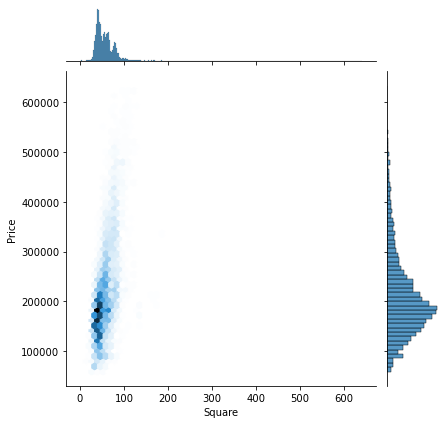

In [120]:
sns.jointplot(data=train_data, x='Square', y='Price', kind='hex')

In [121]:
# Распределение переменной "Количество комнат" (Rooms)

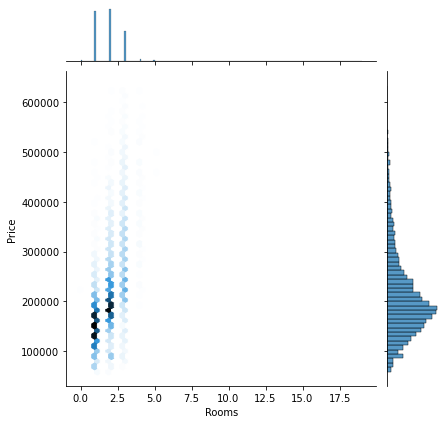

In [122]:
sns.jointplot(data=train_data, x='Rooms', y='Price', kind='hex')

In [123]:
# Распределение переменной "Этаж" (Floor)

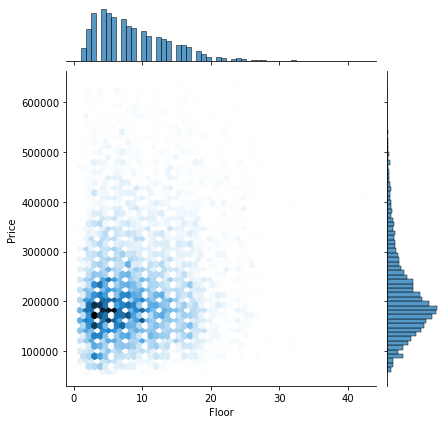

In [124]:
sns.jointplot(data=train_data, x='Floor', y='Price', kind='hex')

In [125]:
# Распределение переменной "Район" (DistrictId)

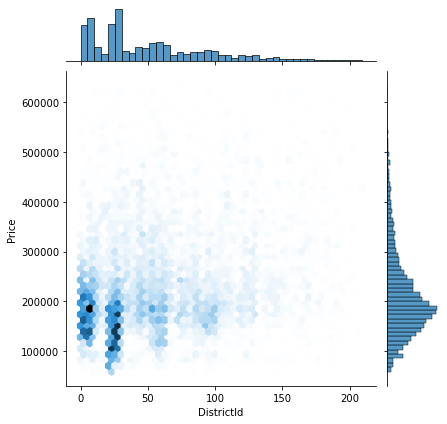

In [126]:
sns.jointplot(data=train_data, x='DistrictId', y='Price', kind='hex')

In [127]:
# Распределение переменной "Год постройки" (HouseYear)

<AxesSubplot:xlabel='HouseYear', ylabel='Price'>

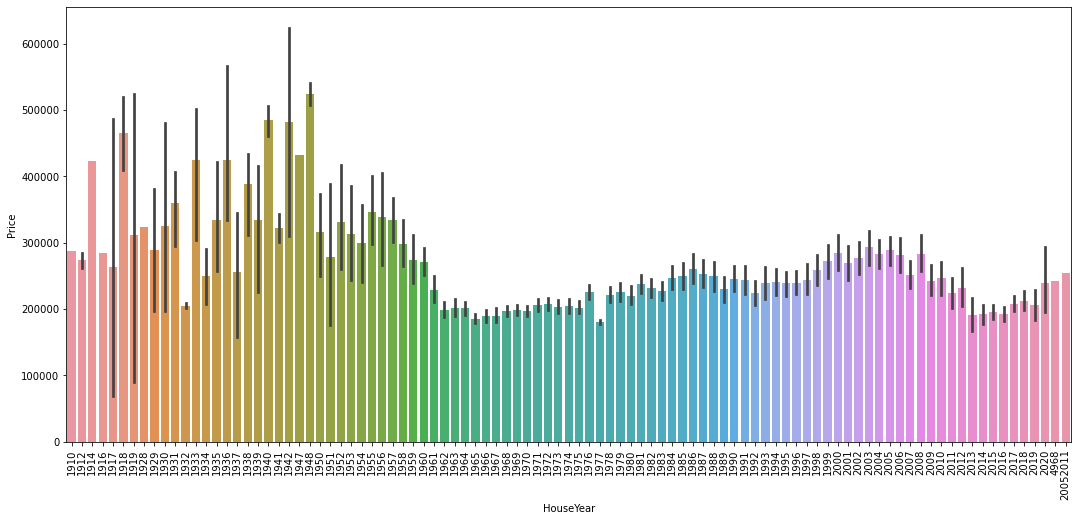

In [128]:
plt.figure(figsize=(18, 8))
plt.xticks(rotation=90)
sns.barplot(x=train_data['HouseYear'], y=train_data['Price'])

In [129]:
# Корреляция данных

<AxesSubplot:>

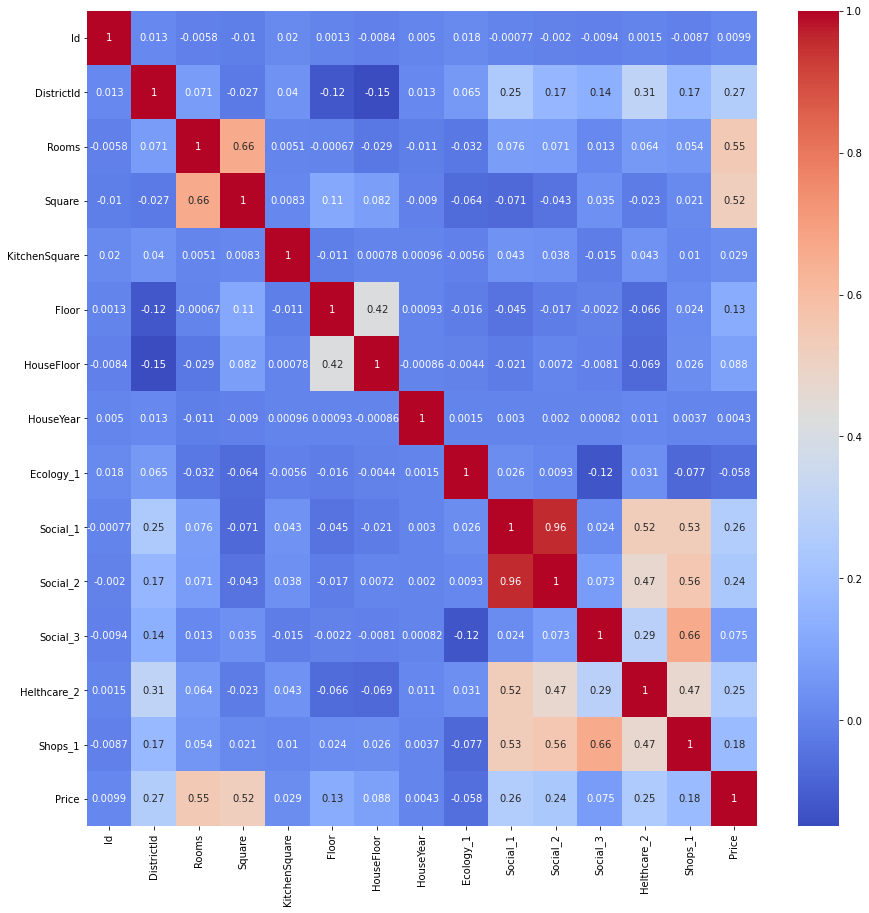

In [130]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

In [131]:
# ОБРАБОТКА ДАННЫХ

In [132]:
train_data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
       'Price'],
      dtype='object')

In [133]:
features = list(train_data.loc[:, train_data.columns != 'Id'].corrwith(train_data['Price']).abs().sort_values(ascending=False)[1:].index)
target = 'Price'

In [134]:
train_data[features].head()

,Rooms,Square,DistrictId,Social_1,Helthcare_2,Social_2,Shops_1,Floor,HouseFloor,Social_3,Ecology_1,KitchenSquare,HouseYear
0,3.0,115.027311,27,11,0,3097,0,4,10.0,0,0.075424,10.0,2014
1,1.0,39.832524,22,30,1,6207,0,7,8.0,1,0.118537,8.0,1966
2,3.0,78.342215,1,33,3,5261,1,2,17.0,0,0.025609,10.0,1988
3,1.0,40.409907,1,1,0,264,1,10,22.0,0,0.007122,1.0,1977
4,2.0,64.285067,94,33,0,8667,6,16,16.0,2,0.282798,9.0,1972


In [135]:
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data[target], test_size=0.3, random_state=42)

In [136]:
X_train.shape

(7000, 13)

In [137]:
X_train.head()

,Rooms,Square,DistrictId,Social_1,Helthcare_2,Social_2,Shops_1,Floor,HouseFloor,Social_3,Ecology_1,KitchenSquare,HouseYear
9069,1.0,38.234365,31,23,0,3684,4,6,3.0,2,0.000000,8.0,1977
2603,1.0,31.309445,11,28,2,6533,5,1,5.0,1,0.038693,5.0,1969
7738,2.0,47.234446,123,47,3,11319,5,2,12.0,0,0.000000,6.0,1980
1579,3.0,63.841680,61,52,1,10311,9,9,12.0,6,0.300323,8.0,1983
5058,1.0,36.054331,27,4,0,915,0,15,17.0,0,0.011654,1.0,2016


In [138]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          7000 non-null   float64
 1   Square         7000 non-null   float64
 2   DistrictId     7000 non-null   int64  
 3   Social_1       7000 non-null   int64  
 4   Helthcare_2    7000 non-null   int64  
 5   Social_2       7000 non-null   int64  
 6   Shops_1        7000 non-null   int64  
 7   Floor          7000 non-null   int64  
 8   HouseFloor     7000 non-null   float64
 9   Social_3       7000 non-null   int64  
 10  Ecology_1      7000 non-null   float64
 11  KitchenSquare  7000 non-null   float64
 12  HouseYear      7000 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 765.6 KB


In [139]:
X_test.shape

(3000, 13)

In [140]:
X_test.head()

,Rooms,Square,DistrictId,Social_1,Helthcare_2,Social_2,Shops_1,Floor,HouseFloor,Social_3,Ecology_1,KitchenSquare,HouseYear
6252,3.0,101.862701,3,43,2,10621,3,7,15.0,1,0.050900,11.0,2013
4684,1.0,87.485627,22,30,1,6207,0,16,0.0,1,0.118537,0.0,1977
1731,2.0,40.649901,152,37,2,6856,5,6,9.0,84,0.042032,7.0,1964
4742,1.0,42.909800,41,36,1,10055,0,14,16.0,3,0.175055,9.0,1980
4521,1.0,35.108196,53,34,1,7759,3,5,12.0,0,0.049637,9.0,1967


In [141]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 6252 to 4705
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          3000 non-null   float64
 1   Square         3000 non-null   float64
 2   DistrictId     3000 non-null   int64  
 3   Social_1       3000 non-null   int64  
 4   Helthcare_2    3000 non-null   int64  
 5   Social_2       3000 non-null   int64  
 6   Shops_1        3000 non-null   int64  
 7   Floor          3000 non-null   int64  
 8   HouseFloor     3000 non-null   float64
 9   Social_3       3000 non-null   int64  
 10  Ecology_1      3000 non-null   float64
 11  KitchenSquare  3000 non-null   float64
 12  HouseYear      3000 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 328.1 KB


In [142]:
# МОДЕЛИРОВАНИЕ

In [143]:
# XGBoost

In [144]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [145]:
y_pred = model_xgb.predict(X_test)

In [146]:
y_pred

array([209593.05, 286903.53, 260485.23, ..., 186639.56, 380379.97,
       164834.77], dtype=float32)

In [147]:
r2_score(y_test, y_pred)

0.7381675017077858

In [148]:
# ПРОГНОЗИРОВАНИЕ

In [149]:
test_features = list(X_train.columns)

In [150]:
test_data[test_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          5000 non-null   float64
 1   Square         5000 non-null   float64
 2   DistrictId     5000 non-null   int64  
 3   Social_1       5000 non-null   int64  
 4   Helthcare_2    5000 non-null   int64  
 5   Social_2       5000 non-null   int64  
 6   Shops_1        5000 non-null   int64  
 7   Floor          5000 non-null   int64  
 8   HouseFloor     5000 non-null   float64
 9   Social_3       5000 non-null   int64  
 10  Ecology_1      5000 non-null   float64
 11  KitchenSquare  5000 non-null   float64
 12  HouseYear      5000 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 507.9 KB


In [151]:
test_data['Price'] = model_xgb.predict(test_data[test_features])

/Users/phocaman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


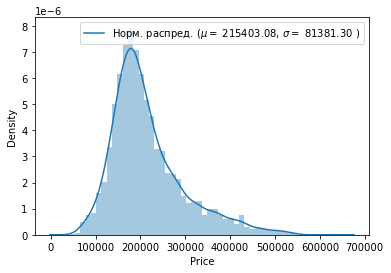

In [152]:
sns.distplot(test_data['Price'])
mean_, std_ = norm.fit(test_data['Price'])
plt.legend([f'Норм. распред. ($\mu=$ {mean_:.2f}, $\sigma=$ {std_:.2f} )'], loc='best')

In [153]:
# ВЫГРУЗКА ДАННЫХ

In [154]:
test_data[['Id', 'Price']].to_csv('G_Eremin_preds.csv', index=None)